**Tasks for milestone 2**
* Data wrangling: clean and deal with unvalid or missing data; combine data files for useful information
* Construct a countries occurence list
* Identify key words related to international affairs in the body text
* Find the communication frequency between Hillary and the others
* Personal social network creation and analysis: use the communication frequency to create a personal social network of Hillary and analyze the network structure

The dataset is on [Kaggle](https://www.kaggle.com/kaggle/hillary-clinton-emails)

In [1]:
import seaborn as sn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.

## Occurrence World Map
To visualize the occurrence of each country or region in Hillary's emails, we create a Occurrence World Map. This map allocates a certain color, from light orange to dark red, to each country (or region) with respect to the frequency of occurrence of the country (or region). The darker a country (or region) is, the higher frequency of occurrence the country has.

The geojson data is from [geojson-maps](https://geojson-maps.ash.ms/).

TODO list:
1. obtian the timestamp of occurrence of each country
2. visualize the time series using an interactive map
3. analyze the results.

In [2]:
import os
import json
import folium
import branca

First, we load the json data and the occurrence list, then we create two maps.

In [3]:
# load countries' boundaries and occurance of each country
json_path      =  r'.\additional-data\worldmap.geo.json'
country_path   =  r'.\additional-data\occurance_list.csv'
geo_json_data  =  json.load(open(json_path))
country_list   =  pd.read_csv(country_path)
country_list.drop(['Unnamed: 0'], axis = 1, inplace=True)

# create world map and mideast map
world_map      =  folium.Map([46,17], tiles='cartodbpositron', zoom_start=2)
MidEast_map    =  folium.Map([33,58], tiles='cartodbpositron', zoom_start=4)

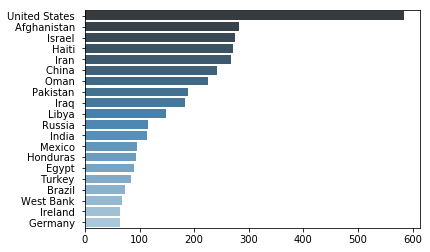

In [4]:
top_20 = country_list.iloc[:,1:country_list.shape[1]].sum(axis=0).sort_values(ascending=False).head(20)
sn.barplot(x = top_20, y=top_20.index,  palette="Blues_d", orient = 'h');

As we kown, from 2009 to 2013, Hillary Rodham Clinton was the United States Secretary of State. So, 'United States' is the most frequent country appearing in Hillary's email. However, since we are more interested in the occurrence of other countries, we drop the data of U.S. 

In addition, we modify the name of each coutry becuase every original country name is followed by a space which is very inconvenient during map creation. 

In [5]:
# drop data that are irrelevant to our analysis
country_list   = country_list.drop(['United States '], axis = 1)
country_count  = pd.DataFrame( {'countries': country_list.columns.values[1:], 'counts':country_list.sum()[1:]} )
country_count  = country_count.reset_index(drop=True)
country_count.countries = country_count.countries.apply(lambda s: s[:-1])

# create a color map
colorscale = branca.colormap.linear.OrRd_09.scale( 0, country_count.counts.max() )

In [6]:
# define a style_function to specify the appearance of our map
def counts_colors(country):
    """Maps counts to different color."""
    try:  
        # if the the country (in the geo json file) is contained in the country_counts dataframe, get its frequency (counts)
        freq = country_count.loc[country_count['countries'] == country, 'counts'].values[0]
    except:
        # the country is not in the dataframe, set its value to np.nan
        freq = np.nan
        
    if np.isnan(freq):
        # for country not in the dataframe, map it to white
        return '#4D5656'
    else:
        # for country in the dataframe, map it to its cooresponding color
        return colorscale(freq)

In [7]:
# add geo data to the map, with different colors representing different frequencies ( orange -> red <=> low freq -> high freq )
folium.GeoJson(
    geo_json_data,
    style_function=lambda feature: {
        'fillColor': counts_colors(feature['properties']['name']),
        'fillOpacity': 0.8,
        'weight': 0
        }
    ).add_to(world_map)

# display the map
world_map

In [8]:
# focus on middle east countries
folium.GeoJson(
    geo_json_data,
    style_function=lambda feature: {
        'fillColor': counts_colors(feature['properties']['name']),
        'fillOpacity': 0.8,
        'weight': 0
        }
    ).add_to(MidEast_map)
MidEast_map